In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy  
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install wget

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


The following lines of code download the Borough details of London Borough and would cleanse the data.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
London_borough_list= pd.read_html(url)[0]

In [3]:
London_borough_list.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [4]:
LondonBoroughData = pd.DataFrame(London_borough_list)

In [5]:
LondonBoroughData.head()


,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [6]:
London_Borough_data = LondonBoroughData[['Borough']].copy()

In [7]:
London_Borough_data

,Borough
0,Barking and Dagenham [note 1]
1,Barnet
2,Bexley
3,Brent
4,Bromley
5,Camden
6,Croydon
7,Ealing
8,Enfield
9,Greenwich [note 2]


In [8]:
LondonDistrict = pd.read_csv("Postcode_districts.csv")

In [9]:
LondonDistrict.head()

,Postcode,Latitude,Longitude,Easting,Northing,Grid Reference,Town/Area,Region,Postcodes,Active postcodes,Population,Households,Nearby districts
0,AB1,57.1269,-2.13644,391839.0,804005.0,NJ918040,Aberdeen,Aberdeen,2655.0,0.0,NaN,NaN,"AB10, AB15, AB9, AB25, AB2, AB12, AB16, AB11, ..."
1,AB2,57.1713,-2.14152,391541.0,808948.0,NJ915089,Aberdeen,Aberdeen,3070.0,0.0,NaN,NaN,"AB16, AB22, AB24, AB25, AB1, AB9, AB15, AB10, ..."
2,AB3,57.0876,-2.59624,363963.0,799780.0,NO639997,Aberdeen,Aberdeen,2168.0,0.0,NaN,NaN,"AB31, AB34, AB52, AB33, AB14, AB32, AB30, AB13..."
3,AB4,57.5343,-2.12713,392487.0,849358.0,NJ924493,"Fraserburgh, Peterhead, Macduff",Aberdeen,2956.0,0.0,NaN,NaN,"AB41, AB43, AB42, AB53, AB22, AB23, AB2, AB24,..."
4,AB5,57.4652,-2.64764,361248.0,841843.0,NJ612418,"Buckie, Huntly, Inverurie",Aberdeen,3002.0,0.0,NaN,NaN,"AB54, AB52, AB45, AB53, AB33, AB44, AB55, AB51..."


In [10]:
LondonDistrictTrimmed = LondonDistrict[['Postcode','Latitude','Longitude','Region','Postcodes']].copy()

In [11]:
LondonDistrictTrimmed.head()

,Postcode,Latitude,Longitude,Region,Postcodes
0,AB1,57.1269,-2.13644,Aberdeen,2655.0
1,AB2,57.1713,-2.14152,Aberdeen,3070.0
2,AB3,57.0876,-2.59624,Aberdeen,2168.0
3,AB4,57.5343,-2.12713,Aberdeen,2956.0
4,AB5,57.4652,-2.64764,Aberdeen,3002.0


In [12]:
LondonBoroughwithGIS = LondonDistrictTrimmed.loc[LondonDistrictTrimmed['Region'].isin(London_Borough_data['Borough'])]

In [13]:
LondonBoroughwithGIS

,Postcode,Latitude,Longitude,Region,Postcodes
267,BR1,51.4107,0.019417,Bromley,2072.0
268,BR2,51.3904,0.021653,Bromley,1403.0
269,BR3,51.4034,-0.031672,Bromley,2092.0
270,BR4,51.3757,-0.009896,Bromley,583.0
271,BR5,51.3892,0.102547,Bromley,1306.0
272,BR6,51.3674,0.092485,Bromley,1663.0
273,BR7,51.4118,0.059618,Bromley,724.0
275,BR98,NaN,NaN,Bromley,5.0
578,CR0,51.3732,-0.078137,Croydon,2816.0
579,CR2,51.3451,-0.095421,Croydon,2144.0


In [14]:
LondonData = LondonBoroughwithGIS[LondonBoroughwithGIS.Postcodes != 67.0]

In [15]:
LondonData

,Postcode,Latitude,Longitude,Region,Postcodes
267,BR1,51.4107,0.019417,Bromley,2072.0
268,BR2,51.3904,0.021653,Bromley,1403.0
269,BR3,51.4034,-0.031672,Bromley,2092.0
270,BR4,51.3757,-0.009896,Bromley,583.0
271,BR5,51.3892,0.102547,Bromley,1306.0
272,BR6,51.3674,0.092485,Bromley,1663.0
273,BR7,51.4118,0.059618,Bromley,724.0
275,BR98,NaN,NaN,Bromley,5.0
578,CR0,51.3732,-0.078137,Croydon,2816.0
579,CR2,51.3451,-0.095421,Croydon,2144.0


In [16]:
LondonData = LondonData[LondonData.Postcodes != 5.0]


In [17]:
LondonData

,Postcode,Latitude,Longitude,Region,Postcodes
267,BR1,51.4107,0.019417,Bromley,2072.0
268,BR2,51.3904,0.021653,Bromley,1403.0
269,BR3,51.4034,-0.031672,Bromley,2092.0
270,BR4,51.3757,-0.009896,Bromley,583.0
271,BR5,51.3892,0.102547,Bromley,1306.0
272,BR6,51.3674,0.092485,Bromley,1663.0
273,BR7,51.4118,0.059618,Bromley,724.0
578,CR0,51.3732,-0.078137,Croydon,2816.0
579,CR2,51.3451,-0.095421,Croydon,2144.0
580,CR3,51.2979,-0.096841,Croydon,1913.0


The following lines of code get the geo coordinates of London.

In [18]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


The Following lines of codes will show all the boroughs of london marked on a map of london.

In [19]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(LondonData['Latitude'], LondonData['Longitude'], LondonData['Region']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [221]:
%%html
<img src="London_Borough_map.jpg",width="200",height="200">

Getting the attributes of the API call in order.

In [20]:
CLIENT_ID = 'L2YC5V3P20VYR5G54RNBYOGX5KHVPCESQJNCWOKDENXKZOKS' # your Foursquare ID
CLIENT_SECRET = 'MZSNJU4D3JBWXJWPARX0XU1PQG0DI50L3SAGURYJP2HJXPES' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L2YC5V3P20VYR5G54RNBYOGX5KHVPCESQJNCWOKDENXKZOKS
CLIENT_SECRET:MZSNJU4D3JBWXJWPARX0XU1PQG0DI50L3SAGURYJP2HJXPES


Getting the url in order for the foursquare API call

In [21]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=L2YC5V3P20VYR5G54RNBYOGX5KHVPCESQJNCWOKDENXKZOKS&client_secret=MZSNJU4D3JBWXJWPARX0XU1PQG0DI50L3SAGURYJP2HJXPES&v=20180605&ll=51.5073219,-0.1276474&radius=500&limit=100'

In [22]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d568761db1d81002cac3f66'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Westminster',
  'headerFullLocation': 'Westminster, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 155,
  'suggestedBounds': {'ne': {'lat': 51.5118219045,
    'lng': -0.12043098456785678},
   'sw': {'lat': 51.5028218955, 'lng': -0.1348638154321432}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ac518cdf964a520e6a520e3',
       'name': 'National Gallery',
       'location': {'address': 'Trafalgar Sq',
        'lat': 51.50887601013219,
        'lng': -0.1284778118133545,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.5088

The following lines of code read the result json file we got as a result of the foursquare API call and get the required details from the file into a seperate DataFrame.

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues_London = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_London = nearby_venues_London.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_London['venue.categories'] = nearby_venues_London.apply(get_category_type, axis=1)

# clean columns
nearby_venues_London.columns = [col.split(".")[-1] for col in nearby_venues_London.columns]

nearby_venues_London.head()

,name,categories,lat,lng
0,National Gallery,Art Museum,51.508876,-0.128478
1,Trafalgar Square,Plaza,51.508128,-0.128086
2,East Trafalgar Square Fountain,Fountain,51.508088,-0.127700
3,Sainsbury Wing National Gallery,Art Museum,51.508384,-0.129001
4,ESPA Life at Corinthia,Spa,51.506402,-0.125114


In [27]:
London_restaurants = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Restaurant")].reset_index(drop=True)

In [28]:
London_Coffee = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Coffee")].reset_index(drop=True)

In [29]:
London_Hotel = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Hotel")].reset_index(drop=True)

In [30]:
London_Burger = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Burger")].reset_index(drop=True)

In [31]:
London_pizza = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Pizza")].reset_index(drop=True)

In [32]:
London_eateries = pd.concat([London_Coffee,London_Hotel,London_restaurants,London_Burger,London_pizza]).reset_index(drop=True)

In [33]:
London_eateries.shape

(36, 4)

The following lines of code plot the eateries in london on a map.

In [35]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=15.5)

# add markers to map
for lat, lng, label in zip(London_eateries['lat'], London_eateries['lng'], London_eateries['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [223]:
%%html
<img src="London_eateries_pic.jpg",width="200",height="200">

In [37]:
London_Gallery = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Gallery")].reset_index(drop=True)

In [38]:
London_Museum = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Museum")].reset_index(drop=True)

In [39]:
London_Monument = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Monument")].reset_index(drop=True)

In [40]:
London_Sculpture = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Sculpture")].reset_index(drop=True)

In [41]:
London_church = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Church")].reset_index(drop=True)

In [42]:
London_Historic_places = pd.concat([London_Gallery,London_Museum,London_Monument,London_Sculpture,London_church]).reset_index(drop=True)

In [43]:
London_Historic_places.shape

(11, 4)

The following lines of code plot london's hostoric places to visit on a map.

In [44]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(London_Historic_places['lat'], London_Historic_places['lng'], London_Historic_places['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [224]:
%%html
<img src="London_Historic_places_pic.jpg",width="200",height="200">

In [45]:
London_Theater = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Theater")].reset_index(drop=True)

In [46]:
London_Bars = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Bar")].reset_index(drop=True)

In [47]:
London_Pubs = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Pub")].reset_index(drop=True)

In [48]:
London_spa = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Spa")].reset_index(drop=True)

In [49]:
London_recreation = pd.concat([London_Theater,London_Bars,London_Pubs,London_spa]).reset_index(drop=True)

In [50]:
London_recreation.shape

(25, 4)

The following code plot London's recreational spots on a map.

In [51]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(London_recreation['lat'], London_recreation['lng'], London_recreation['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [225]:
%%html
<img src="London_recreation_pic.jpg",width="200",height="200">

In [52]:
London_Plaza = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Plaza")].reset_index(drop=True)

In [53]:
London_Store = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Store")].reset_index(drop=True)

In [54]:
London_Shop = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Shop")].reset_index(drop=True)

In [55]:
London_Boutique= nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Boutique")].reset_index(drop=True)

In [56]:
London_shopping = pd.concat([London_Plaza,London_Store,London_Shop,London_Boutique]).reset_index(drop=True)

In [57]:
London_shopping.shape

(16, 4)

The following lines of code plot London's shopping areas on a map.

In [58]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(London_shopping['lat'], London_shopping['lng'], London_shopping['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [227]:
%%html
<img src="London_shopping_pic.jpg",width="200",height="200">

In [97]:
London_Garden = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Garden")].reset_index(drop=True)

In [181]:
London_Garden.shape

(3, 4)

The following lines of code plots London's gardens on a map

In [99]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(London_Garden['lat'], London_Garden['lng'], London_Garden['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [228]:
%%html
<img src="London_gardens_pic.jpg",width="200",height="200">

The following lines of code loads New York borough details.

In [182]:
url = 'https://en.wikipedia.org/wiki/Boroughs_of_New_York_City'
NewYork_borough_list= pd.read_html(url)[0]

In [183]:
NewYork_borough = pd.DataFrame(NewYork_borough_list)

In [184]:
NewYork_borough[['Borough','County','Population','GDP_billons','GDP_per_capita','Land_Area_Sqmile','Land_Area_Sqkm','Person/sq.mi','Person/sq.km']] = pd.DataFrame(NewYork_borough_list)

In [185]:
NewYork_borough_DF = NewYork_borough[['Borough','County','Population','GDP_billons','GDP_per_capita','Land_Area_Sqmile','Land_Area_Sqkm','Person/sq.mi','Person/sq.km']].copy()

In [186]:
NewYork_borough_DF 

,Borough,County,Population,GDP_billons,GDP_per_capita,Land_Area_Sqmile,Land_Area_Sqkm,Person/sq.mi,Person/sq.km
,,,,,,,,,
,,,,,,,,,
0,The Bronx,Bronx,1471160,28.787,19570,42.10,109.04,34653,13231
1,Brooklyn,Kings,2648771,63.303,23900,70.82,183.42,37137,14649
2,Manhattan,New York,1664727,629.682,378250,22.83,59.13,72033,27826
3,Queens,Queens,2358582,73.842,31310,108.53,281.09,21460,8354
4,Staten Island,Richmond,479458,11.249,23460,58.37,151.18,8112,3132
5,City of New York,City of New York,8622698,806.863,93574,302.64,783.83,28188,10947
6,State of New York,State of New York,19849399,1547.116,78354,47214,122284,416.4,159
7,Sources:[5] and see individual borough articles,Sources:[5] and see individual borough articles,Sources:[5] and see individual borough articles,Sources:[5] and see individual borough articles,Sources:[5] and see individual borough articles,Sources:[5] and see individual borough articles,Sources:[5] and see individual borough articles,Sources:[5] and see individual borough articles,Sources:[5] and see individual borough articles


In [189]:
NewYork_borough = NewYork_borough_DF.drop([7])

In [190]:
NewYork_borough

,Borough,County,Population,GDP_billons,GDP_per_capita,Land_Area_Sqmile,Land_Area_Sqkm,Person/sq.mi,Person/sq.km
,,,,,,,,,
,,,,,,,,,
0,The Bronx,Bronx,1471160,28.787,19570,42.10,109.04,34653,13231
1,Brooklyn,Kings,2648771,63.303,23900,70.82,183.42,37137,14649
2,Manhattan,New York,1664727,629.682,378250,22.83,59.13,72033,27826
3,Queens,Queens,2358582,73.842,31310,108.53,281.09,21460,8354
4,Staten Island,Richmond,479458,11.249,23460,58.37,151.18,8112,3132
5,City of New York,City of New York,8622698,806.863,93574,302.64,783.83,28188,10947
6,State of New York,State of New York,19849399,1547.116,78354,47214,122284,416.4,159


The following lines of code generate the latitude and longitude details of New York boorughs and include them into the Data Frame.

In [191]:
address = 'The Bronx, United States'

geolocator = Nominatim(user_agent="NewYork_explorer")
location = geolocator.geocode(address)
Bronx_latitude = location.latitude
Bronx_longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(Bronx_latitude, Bronx_longitude))

The geograpical coordinate of London are 40.85048545, -73.8404035580209.


In [192]:
address = 'Brooklyn, United States'

geolocator = Nominatim(user_agent="NewYork_explorer")
location = geolocator.geocode(address)
Brooklyn_latitude = location.latitude
Brooklyn_longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(Brooklyn_latitude, Brooklyn_longitude))

The geograpical coordinate of London are 40.6501038, -73.9495823.


In [193]:
address = 'Manhattan, United States'

geolocator = Nominatim(user_agent="NewYork_explorer")
location = geolocator.geocode(address)
Manhattan_latitude = location.latitude
Manhattan_longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(Manhattan_latitude, Manhattan_longitude))

The geograpical coordinate of London are 40.7900869, -73.9598295.


In [194]:
address = 'Queens, United States'

geolocator = Nominatim(user_agent="NewYork_explorer")
location = geolocator.geocode(address)
Queens_latitude = location.latitude
Queens_longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(Queens_latitude, Queens_longitude))

The geograpical coordinate of London are 40.6524927, -73.7914214158161.


In [195]:
address = 'Staten Island, United States'

geolocator = Nominatim(user_agent="NewYork_explorer")
location = geolocator.geocode(address)
Staten_Island_latitude = location.latitude
Staten_Island_longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(Staten_Island_latitude, Staten_Island_longitude))

The geograpical coordinate of London are 40.5834557, -74.1496048.


In [196]:
address = 'City of New York, United States'

geolocator = Nominatim(user_agent="NewYork_explorer")
location = geolocator.geocode(address)
city_of_NewYork_latitude = location.latitude
city_of_NewYork_longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(city_of_NewYork_latitude, city_of_NewYork_longitude))

The geograpical coordinate of London are 40.7127281, -74.0060152.


In [197]:
address = 'State of New York, United States'

geolocator = Nominatim(user_agent="NewYork_explorer")
location = geolocator.geocode(address)
State_of_NewYork_latitude = location.latitude
State_of_NewYork_longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(State_of_NewYork_latitude, State_of_NewYork_longitude))

The geograpical coordinate of London are 40.7372329, -73.8624770235256.


In [200]:
address = 'New York, United States'

geolocator = Nominatim(user_agent="NewYork_explorer")
location = geolocator.geocode(address)
NewYork_latitude = location.latitude
NewYork_longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(NewYork_latitude, NewYork_longitude))



The geograpical coordinate of London are 40.7127281, -74.0060152.


In [212]:
latitude = [Bronx_latitude, Brooklyn_latitude, Manhattan_latitude, Queens_latitude, Staten_Island_latitude, city_of_NewYork_latitude, State_of_NewYork_latitude]

In [213]:
longitude = [Bronx_longitude, Brooklyn_longitude, Manhattan_longitude, Queens_longitude, Staten_Island_longitude, city_of_NewYork_longitude, State_of_NewYork_longitude]

In [214]:
NewYork_borough['Latitude'] = latitude

In [215]:
NewYork_borough['Longitude'] = longitude

In [216]:
NewYork_borough

,Borough,County,Population,GDP_billons,GDP_per_capita,Land_Area_Sqmile,Land_Area_Sqkm,Person/sq.mi,Person/sq.km,Latitude,Longitude
,,,,,,,,,,,
,,,,,,,,,,,
0,The Bronx,Bronx,1471160,28.787,19570,42.10,109.04,34653,13231,40.850485,-73.840404
1,Brooklyn,Kings,2648771,63.303,23900,70.82,183.42,37137,14649,40.650104,-73.949582
2,Manhattan,New York,1664727,629.682,378250,22.83,59.13,72033,27826,40.790087,-73.959829
3,Queens,Queens,2358582,73.842,31310,108.53,281.09,21460,8354,40.652493,-73.791421
4,Staten Island,Richmond,479458,11.249,23460,58.37,151.18,8112,3132,40.583456,-74.149605
5,City of New York,City of New York,8622698,806.863,93574,302.64,783.83,28188,10947,40.712728,-74.006015
6,State of New York,State of New York,19849399,1547.116,78354,47214,122284,416.4,159,40.737233,-73.862477


The following lines of code show the NewYork boroughs on a map.

In [219]:
map_NewYork = folium.Map(location=[NewYork_latitude, NewYork_longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(NewYork_borough['Latitude'], NewYork_borough['Longitude'], NewYork_borough['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

In [229]:
%%html
<img src="NewYork_borough_pic.jpg",width="200",height="200">

The following lines of code get the creadentials for the foursquare API call in order.

In [68]:
CLIENT_ID = 'L2YC5V3P20VYR5G54RNBYOGX5KHVPCESQJNCWOKDENXKZOKS' # your Foursquare ID
CLIENT_SECRET = 'MZSNJU4D3JBWXJWPARX0XU1PQG0DI50L3SAGURYJP2HJXPES' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L2YC5V3P20VYR5G54RNBYOGX5KHVPCESQJNCWOKDENXKZOKS
CLIENT_SECRET:MZSNJU4D3JBWXJWPARX0XU1PQG0DI50L3SAGURYJP2HJXPES


In [69]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    NewYork_latitude, 
    NewYork_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=L2YC5V3P20VYR5G54RNBYOGX5KHVPCESQJNCWOKDENXKZOKS&client_secret=MZSNJU4D3JBWXJWPARX0XU1PQG0DI50L3SAGURYJP2HJXPES&v=20180605&ll=40.7127281,-74.0060152&radius=500&limit=100'

In [70]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d568829d2495d0026b0e3db'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 173,
  'suggestedBounds': {'ne': {'lat': 40.7172281045, 'lng': -74.00008952063419},
   'sw': {'lat': 40.7082280955, 'lng': -74.0119408793658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,
        'labe

The following lines of code read the resulting json file, and collect the needed details from it into a Dataframe.

In [71]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [72]:
venues = results['response']['groups'][0]['items']
    
nearby_venues_NewYork = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_NewYork =nearby_venues_NewYork.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_NewYork['venue.categories'] = nearby_venues_NewYork.apply(get_category_type, axis=1)

# clean columns
nearby_venues_NewYork.columns = [col.split(".")[-1] for col in nearby_venues_NewYork.columns]

nearby_venues_NewYork.head()

,name,categories,lat,lng
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,The Beekman - A Thompson Hotel,Hotel,40.711173,-74.006702
2,City Hall Park,Park,40.712415,-74.006724
3,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272
4,The Wooly Daily,Coffee Shop,40.712137,-74.008395


In [73]:
nearby_venues_NewYork

,name,categories,lat,lng
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,The Beekman - A Thompson Hotel,Hotel,40.711173,-74.006702
2,City Hall Park,Park,40.712415,-74.006724
3,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272
4,The Wooly Daily,Coffee Shop,40.712137,-74.008395
5,Gibney Dance Center Downtown,Dance Studio,40.713923,-74.005661
6,Augustine,French Restaurant,40.711310,-74.006660
7,The Class by Taryn Toomey,Gym / Fitness Center,40.712753,-74.008734
8,Takahachi Bakery,Bakery,40.713653,-74.008804
9,Aahar Indian Cuisine,Indian Restaurant,40.713307,-74.007994


In [74]:
NewYork_Restaurants = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Restaurant")].reset_index(drop=True)

In [75]:
NewYork_CoffeeShop = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Coffee")].reset_index(drop=True)

In [76]:
NewYork_Bakery = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Bakery")].reset_index(drop=True)

In [77]:
NewYork_Pizza = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Pizza")].reset_index(drop=True)

In [78]:
NewYork_Burger = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Burger")].reset_index(drop=True)

In [79]:
NewYork_Hotel = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Hotel")].reset_index(drop=True)

In [80]:
NewYork_Sandwich = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Sandwich")].reset_index(drop=True) 

In [81]:
NewYork_Burrito = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Burrito")].reset_index(drop=True) 

In [82]:
NY_eateries = pd.concat([NewYork_Burger,NewYork_Pizza,NewYork_Bakery,NewYork_CoffeeShop,NewYork_Restaurants,NewYork_Sandwich,NewYork_Hotel,NewYork_Burrito]).reset_index(drop=True)

In [83]:
NY_eateries.shape

(44, 4)

The following lines of code shows the various dining places in New York on a map. 

In [85]:
map_NewYork = folium.Map(location=[NewYork_latitude, NewYork_longitude], zoom_start=16)

# add markers to map
for lat, lng, label in zip(NY_eateries['lat'], NY_eateries['lng'], NY_eateries['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

In [230]:
%%html
<img src="NewYork_eateries_pic.jpg",width="200",height="200">

In [86]:
NewYork_Gallery = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Gallery")].reset_index(drop=True)

In [87]:
NewYork_Museum = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Museum")].reset_index(drop=True)

In [88]:
NewYork_Historic_places= pd.concat([NewYork_Gallery,NewYork_Museum]).reset_index(drop=True)

In [89]:
NewYork_Historic_places.shape

(1, 4)

The following lines of code shows the various historic places in New York on a map.

In [90]:
map_NewYork = folium.Map(location=[NewYork_latitude, NewYork_longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(NewYork_Historic_places['lat'], NewYork_Historic_places['lng'], NewYork_Historic_places['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

In [231]:
%%html
<img src="NewYork_historic_places_pic.jpg",width="200",height="200">

In [101]:
NewYork_bars = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Bar")].reset_index(drop=True)

In [115]:
NewYork_spa = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("spa")].reset_index(drop=True)

In [117]:
NewYork_studio = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Studio")].reset_index(drop=True)

In [119]:
NewYork_recreation = pd.concat([NewYork_bars,NewYork_spa,NewYork_studio]).reset_index(drop=True)

In [120]:
NewYork_recreation.shape

(10, 4)

The following code plots the bars and other recreational places in New York on a map.

In [121]:
map_NewYork = folium.Map(location=[NewYork_latitude, NewYork_longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(NewYork_recreation['lat'], NewYork_recreation['lng'], NewYork_recreation['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

In [232]:
%%html
<img src="NewYork_Recreation_pic.jpg",width="200",height="200">

In [107]:
NY_Plaza = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Plaza")].reset_index(drop=True)

In [108]:
NY_Shop = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Shop")].reset_index(drop=True)

In [109]:
NY_Store = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Store")].reset_index(drop=True)

In [110]:
NY_Boutique = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Boutique")].reset_index(drop=True)

In [112]:
NY_Shopping = pd.concat([NY_Plaza,NY_Shop,NY_Store,NY_Boutique]).reset_index(drop=True)

In [113]:
NY_Shopping.shape

(26, 4)

The following lines of code shows the shopping areas in New York on a map.

In [114]:
map_NewYork = folium.Map(location=[NewYork_latitude, NewYork_longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(NY_Shopping['lat'], NY_Shopping['lng'], NY_Shopping['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

In [233]:
%%html
<img src="NewYork_shopping_pic.jpg",width="200",height="200">

In [122]:
NY_Park = nearby_venues_NewYork.loc[nearby_venues_NewYork['categories'].str.contains("Park")].reset_index(drop=True)

In [124]:
NY_Park.shape

(2, 4)

The following lines of code shows the parks inside New York city on a map.

In [125]:
map_NewYork = folium.Map(location=[NewYork_latitude, NewYork_longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(NY_Park['lat'], NY_Park['lng'], NY_Park['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

In [236]:
%%html
<img src="New_York_park_pic.jpg",width="200",height="200">

The following lines of code consolidates the details into a Data set.

In [133]:
data = [['Eateries',36,44], ['Historic_places', 11, 1,], ['Recreation',25,10],['Shopping',16,26],['Garden_or_park',3,2]] 

In [135]:
Consolidated_data = pd.DataFrame(data, columns =['Category','London','New York'])

In [136]:
Consolidated_data

,Category,London,New York
0,Eateries,36,44
1,Historic_places,11,1
2,Recreation,25,10
3,Shopping,16,26
4,Garden_or_park,3,2


In [163]:
Consolidated_data.set_index('Category')

,London,New York
Category,,
Eateries,36,44
Historic_places,11,1
Recreation,25,10
Shopping,16,26
Garden_or_park,3,2


Now we plot the details on a Bar plot.

In [158]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


[Text(0, 0, 'Eateries'),
 Text(0, 0, 'Historic_places'),
 Text(0, 0, 'Recreation'),
 Text(0, 0, 'Shopping'),
 Text(0, 0, 'Garden_or_park')]

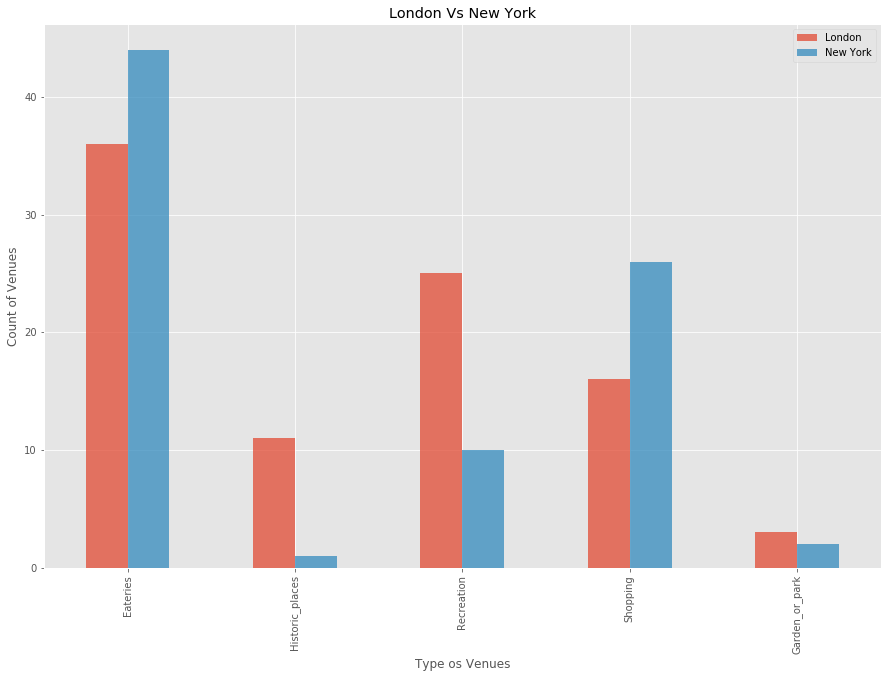

In [177]:
ax = Consolidated_data.plot(kind='bar', alpha=0.75, figsize=(15, 10))

ax.set_title('London Vs New York')
ax.set_ylabel('Count of Venues')
ax.set_xlabel('Type os Venues')
ax.set_xticks(Consolidated_data.index)
ax.set_xticklabels(Consolidated_data.Category, rotation=90)